# NLP

## load data from 'data/IMDB/imdb_data.csv.zip'

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/IMDB/imdb_data_train.zip', compression='zip', header=0, sep=',', quotechar='"')
df.head()

,filename,review,classification,sentiment
0,1821_4.txt,Working with one of the best Shakespeare sourc...,4,0
1,10402_1.txt,"Well...tremors I, the original started off in ...",1,0
2,1062_4.txt,Ouch! This one was a bit painful to sit throug...,4,0
3,9056_1.txt,"I've seen some crappy movies in my life, but t...",1,0
4,5392_3.txt,"""Carriers"" follows the exploits of two guys an...",3,0


## Find if there is a correlation between the number of words of a comment and its sentiment and/or classification

Can you make any conclusions?

In [3]:
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

df[['sentiment', 'word_count']].corr()

,sentiment,word_count
sentiment,1.000000,0.016804
word_count,0.016804,1.000000


In [4]:
df[['classification', 'word_count']].corr()

,classification,word_count
classification,1.00000,0.01413
word_count,0.01413,1.00000


## Do the same as above but for the number of senteces in the document (hint: for now, use the period as a sentence delimiter)

In [5]:
df['sentence_count'] = df['review'].apply(lambda x: len(x.split('.')))

In [6]:
df[['sentiment', 'sentence_count']].corr()

,sentiment,sentence_count
sentiment,1.000000,-0.032144
sentence_count,-0.032144,1.000000


In [7]:
df[['classification', 'sentence_count']].corr()

,classification,sentence_count
classification,1.000000,-0.036023
sentence_count,-0.036023,1.000000


## Make a pivot table with the average number of words per classification and sentiment and plot it as a bar chart

In [8]:
pt = df.pivot_table(index='classification', columns='sentiment', values='word_count', aggfunc=np.mean)
pt

sentiment,0,1
classification,,
1,211.595686,NaN
2,226.199212,NaN
3,250.685537,NaN
4,253.491098,NaN
7,NaN,260.793670
8,NaN,252.252908
9,NaN,245.346443
10,NaN,209.983728


<Axes: xlabel='classification'>

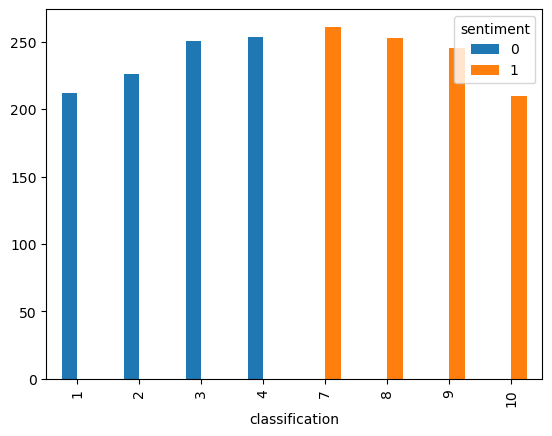

In [9]:
pt.plot.bar()

## Find if there is a correlation between the number of words in a comment and comment's classification, but only for positive sentiment
Conclusion?

In [10]:
pos_df = df[df['sentiment'] == 1]
pos_df

,filename,review,classification,sentiment,word_count,sentence_count
12500,4715_9.txt,For a movie that gets no respect there sure ar...,9,1,52,6
12501,12390_8.txt,Bizarre horror movie filled with famous faces ...,8,1,166,4
12502,8329_7.txt,"A solid, if unremarkable film. Matthau, as Ein...",7,1,55,4
12503,9063_8.txt,It's a strange feeling to sit alone in a theat...,8,1,442,32
12504,3092_10.txt,"You probably all already know this by now, but...",10,1,144,15
...,...,...,...,...,...,...
24995,9707_10.txt,About a year ago I finally gave up on American...,10,1,138,7
24996,35_8.txt,When I saw the elaborate DVD box for this and ...,8,1,129,8
24997,6034_10.txt,"Last November, I had a chance to see this film...",10,1,203,13
24998,2780_9.txt,Great movie -I loved it. Great editing and use...,9,1,121,8


In [11]:
pos_df[['sentiment', 'classification', 'word_count']].corr()

,sentiment,classification,word_count
sentiment,NaN,NaN,NaN
classification,NaN,1.000000,-0.111977
word_count,NaN,-0.111977,1.000000


## Find if there is a correlation between the number of stop words in a comment and comment's classification

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [13]:
def count_stop_words(text):
    return len([w for w in text.split() if w in stop_words])

df['stop_words_count'] = df['review'].apply(count_stop_words)

df[['classification', 'stop_words_count']].corr()

,classification,stop_words_count
classification,1.000000,0.014973
stop_words_count,0.014973,1.000000


## Find if there is a correlation between the number of uper case words in a comment and comment's classification

In [14]:
def count_upper_case(text):
    return len([w for w in text.split() if w.isupper()])

df['upper_case_count'] = df['review'].apply(count_upper_case)

df[['classification', 'upper_case_count']].corr()

,classification,upper_case_count
classification,1.000000,-0.057611
upper_case_count,-0.057611,1.000000


# load the twitter data on folder data/twitter

Note,
 1. The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment

2. The columns are
- target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

In [22]:
df = pd.read_csv('data/twitter/training.1600000.processed.noemoticon.csv.zip', encoding='latin-1', header=None)
df.columns=['target', 'ids', 'date', 'flag', 'user', 'text']
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Randomly sample 1000 rows from the data (use `sample` method and `random_state=42`)



In [23]:
df = df.sample(n=1000, random_state=42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 541200 to 385755
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  1000 non-null   int64 
 1   ids     1000 non-null   int64 
 2   date    1000 non-null   object
 3   flag    1000 non-null   object
 4   user    1000 non-null   object
 5   text    1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 54.7+ KB


# How many tweets are positive, negative and neutral?

In [25]:
df.pivot_table(index='target', values='text', aggfunc='count')

,text
target,
0,496
4,504


# Try the sentiment analysis model, prepared on notebook `07_a_text`, on this data. How does it perform?

In [ ]:
# load the model
import pickle
filename = 'rf_model.sav'
with open('data/twitter/sentiment_model.pkl', 'rb') as f:
    model = pickle.load(f)

# load the vectorizer
filename = 'count_vectorizer.sav'
with open('data/twitter/vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Build a text sentiment model using the `text` column as input and `target` as output

1. Start by cleaning the text (remove stop words, punctuation, etc.)
2. Use BoW to generate features (test without and with the use of 2-grams and 3-grams)
3. Use a classifier of your choice (Random Fores, Logistic Regression, etc.)
4. Use cross validation to evaluate the model
5. Do another sample of the data and see if the results are similar
6. When your model seem tunned, train it on a larger part of the data and save it to disk.